In [1]:
from pyqae.images.pipelines import WrappedChannelTransform, visualize_pipeline
from pyqae.images.pipelines import flatten_transform, add_position_transform, add_normpos_transform, normalize_transform

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import numpy as np

kmeans - (1, 5)
kclass - (1, 5)


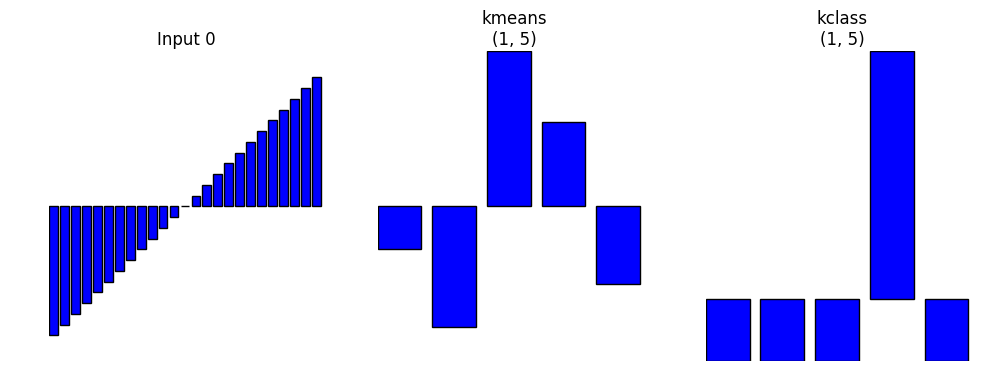

In [3]:
%matplotlib inline
std_pipe = Pipeline([
                   ('kmeans',KMeans(5)),
                   ('kclass',KNeighborsClassifier(1))])
std_pipe.fit(np.random.normal(size=(100,25)),np.random.choice(range(5),size=(100)))
_=visualize_pipeline(std_pipe, np.arange(25).reshape((1,25)),True)

flatten - (1, 25)
kmeans - (1, 5)
kclass - (1, 5)


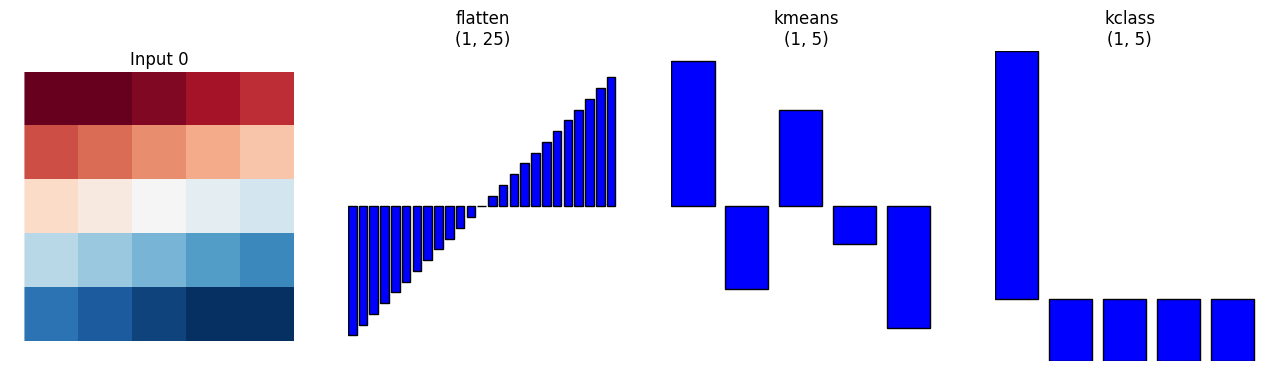

In [4]:
t_pipe = Pipeline([('flatten',flatten_transform()),
                   ('kmeans',KMeans(5)),
                   ('kclass',KNeighborsClassifier(1))])
t_pipe.fit(np.random.normal(size=(100,1,5,5)),np.random.choice(range(5),size=(100)))
_=visualize_pipeline(t_pipe, np.arange(25).reshape((1,1,5,5)),True)

In [5]:
ni_pipe = Pipeline([
        ('Pos',add_position_transform(False,'th')),
        ('KMeans',WrappedChannelTransform(KMeans(8),'th',use_predict=True)),
        ('Flatten',flatten_transform()),
                   ('PCA',PCA(n_components=2)),
                   ('kclass',KNeighborsClassifier(1))])
ni_pipe.fit(np.linspace(0,180,18000).reshape((100,20,3,3)),
            np.random.choice(range(3),size=100))

Pipeline(steps=[('Pos', <pyqae.images.pipelines.ChannelPipeTransform object at 0x117998278>), ('KMeans', <pyqae.images.pipelines.WrappedChannelTransform object at 0x117998048>), ('Flatten', <pyqae.images.pipelines.ImmutablePipeTransform object at 0x1179981d0>), ('PCA', PCA(copy=True, iterated_power='auto', n...owski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform'))])

Pos - (1, 22, 3, 3)
KMeans - (1, 1, 3, 3)
Flatten - (1, 9)
PCA - (1, 2)
kclass - (1, 3)


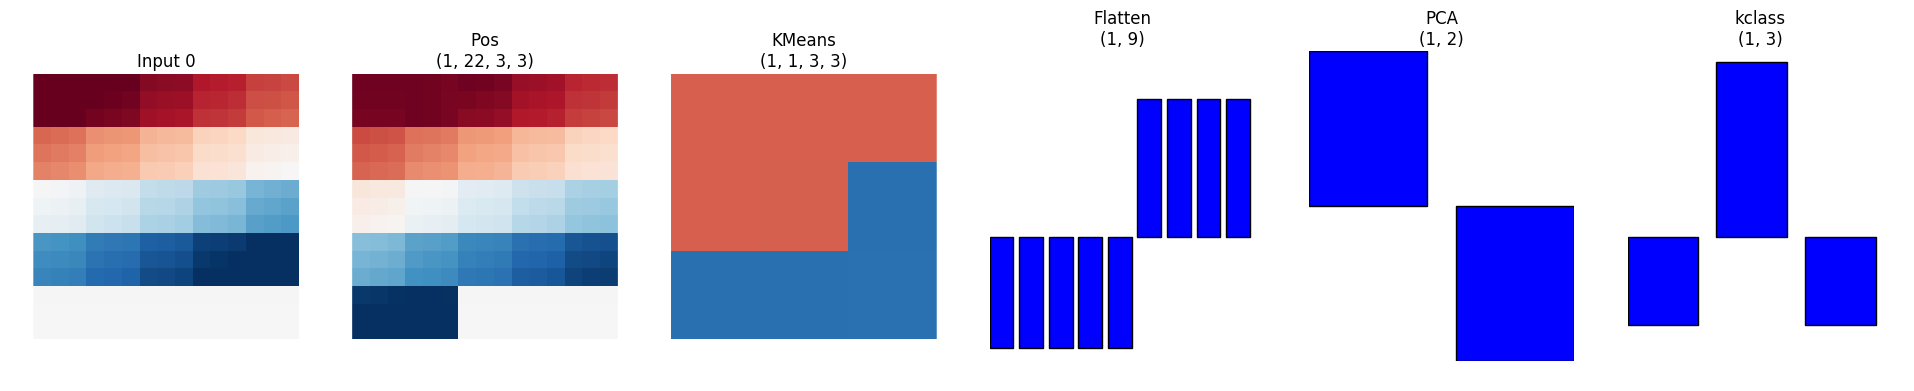

In [6]:
_=visualize_pipeline(ni_pipe,np.arange(180).reshape((1,20,3,3)),True)

In [7]:
ni_pipe = Pipeline([
        ('pca',WrappedChannelTransform(KMeans(3),'th')),
        ('Flatten',flatten_transform()),
                   ('kmeans',PCA(n_components=2)),
                   ('kclass',KNeighborsClassifier(1))])
ni_pipe.fit(np.linspace(0,180,18000).reshape((100,20,3,3)),
            np.random.choice(range(3),size=100))

Pipeline(steps=[('pca', <pyqae.images.pipelines.WrappedChannelTransform object at 0x118a87b00>), ('Flatten', <pyqae.images.pipelines.ImmutablePipeTransform object at 0x118a87940>), ('kmeans', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('kclass', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform'))])

In [8]:
import pandas as pd
pt_table=pd.read_csv('/Users/mader/Dropbox/4Quant/Projects/SIIMTraining/data/overview.csv',index_col=0)

In [9]:
if False:
    with np.load('/Users/mader/Dropbox/4Quant/Projects/SIIMTraining/data/full_archive.npz') as test_image:
        im_data=test_image['image']
        print(test_image.keys())

In [10]:
im_data=np.stack([im for im in im_data if im.shape==(512,512)],0)

NameError: name 'im_data' is not defined

In [ ]:
im_idxs=np.random.permutation(range(len(im_data)))[:20]
new_im_data=255*np.expand_dims(np.stack(im_data,0),1)[:,:,::4,::4]
new_im_data.shape

In [ ]:
%%time
from sklearn.neighbors import KNeighborsRegressor
age_seg_pipe = Pipeline([
        ('KMeans_Intensity',WrappedChannelTransform(KMeans(4),'th',use_predict=True)),
        ('Normalize',normalize_transform()),
        ('Pos',add_normpos_transform(False,'th')),
        ('KMeans',WrappedChannelTransform(KMeans(16),'th')),
        ('PCA_Image',WrappedChannelTransform(PCA(n_components=9),'th')),
        ('Flatten',flatten_transform()),
        ('PCA',PCA(n_components=100)),
        ('kregress',KNeighborsRegressor(3))])
age_seg_pipe.fit(new_im_data[im_idxs],pt_table['Age'].values[im_idxs])

In [ ]:
_=visualize_pipeline(age_seg_pipe,new_im_data[0:2],True)

In [ ]:
age_seg_pipe.predict(new_im_data[50:51])

In [ ]:
im_idxs

In [ ]:
age_seg_pipe.named_steps['KMeans_Intensity'].transform(np.ones((1,1,10,10)))

In [ ]:
fc=KMeans(4)
fc.fit(np.random.normal(size=(10,1)),None)

In [ ]:
fc.predict(np.random.normal(size=(10,1))).shape

In [ ]:
from lungstage.shape_analysis import scalar_attributes_list, regionprops, regionprops_to_df

In [ ]:
scalar_attributes_list(regionprops(np.eye(3).astype(int)))

In [ ]:
regionprops_to_df(regionprops(np.eye(3).astype(int)))

In [11]:
with np.load('/Users/mader/Dropbox/4Quant/Projects/AnatomySegmentation/age_vert_training.npz') as ftd:
    train_img_f = np.expand_dims(ftd['raw_images'],1)
    lab_names = ftd['semantic_names'].astype(np.str) # make into unicode (from py27 byte)
    lab_img = np.stack([ftd['semantic_label']==i for i,_ in enumerate(lab_names) if i>0],1).astype(np.float32)
    im_cnt, im_ch, im_xdim, im_ydim = train_img_f.shape
    print(train_img_f.shape, lab_img.shape, lab_img.dtype, lab_names)

(179, 1, 512, 512) (179, 3, 512, 512) float32 ['nothing' 'bone' 'vert' 'pelvis']


In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

bone_seg_pipe = Pipeline([
        ('KMeans_Intensity',WrappedChannelTransform(KMeans(4),'th',use_predict=True)),
        ('Normalize',normalize_transform()),
        ('Pos',add_normpos_transform(False,'th')),
        ('KMeans',WrappedChannelTransform(KMeans(16),'th')),
        ('PCA_Image',WrappedChannelTransform(PCA(n_components=9),'th')),
        ('kregress',WrappedChannelTransform(KNeighborsRegressor(2),'th',use_predict=True, flatten_y=True, class_predict=False))
    ])

In [13]:
%%time
train_ids=np.random.permutation(range(len(train_img_f)))

c_idx = np.random.choice(train_ids, 30)
x_train = train_img_f[c_idx][:,:,::4,::4]
y_train = np.expand_dims(np.max(lab_img[c_idx],1),1)[:,:,::4,::4]
print(x_train.shape,y_train.shape)
bone_seg_pipe.fit(x_train,y_train)

(30, 1, 128, 128) (30, 1, 128, 128)
CPU times: user 25.7 s, sys: 9.81 s, total: 35.5 s
Wall time: 36.4 s


KMeans_Intensity - (1, 1, 128, 128)
Normalize - (1, 1, 128, 128)
Pos - (1, 3, 128, 128)
KMeans - (1, 16, 128, 128)
PCA_Image - (1, 9, 128, 128)


ValueError: too many values to unpack (expected 2)

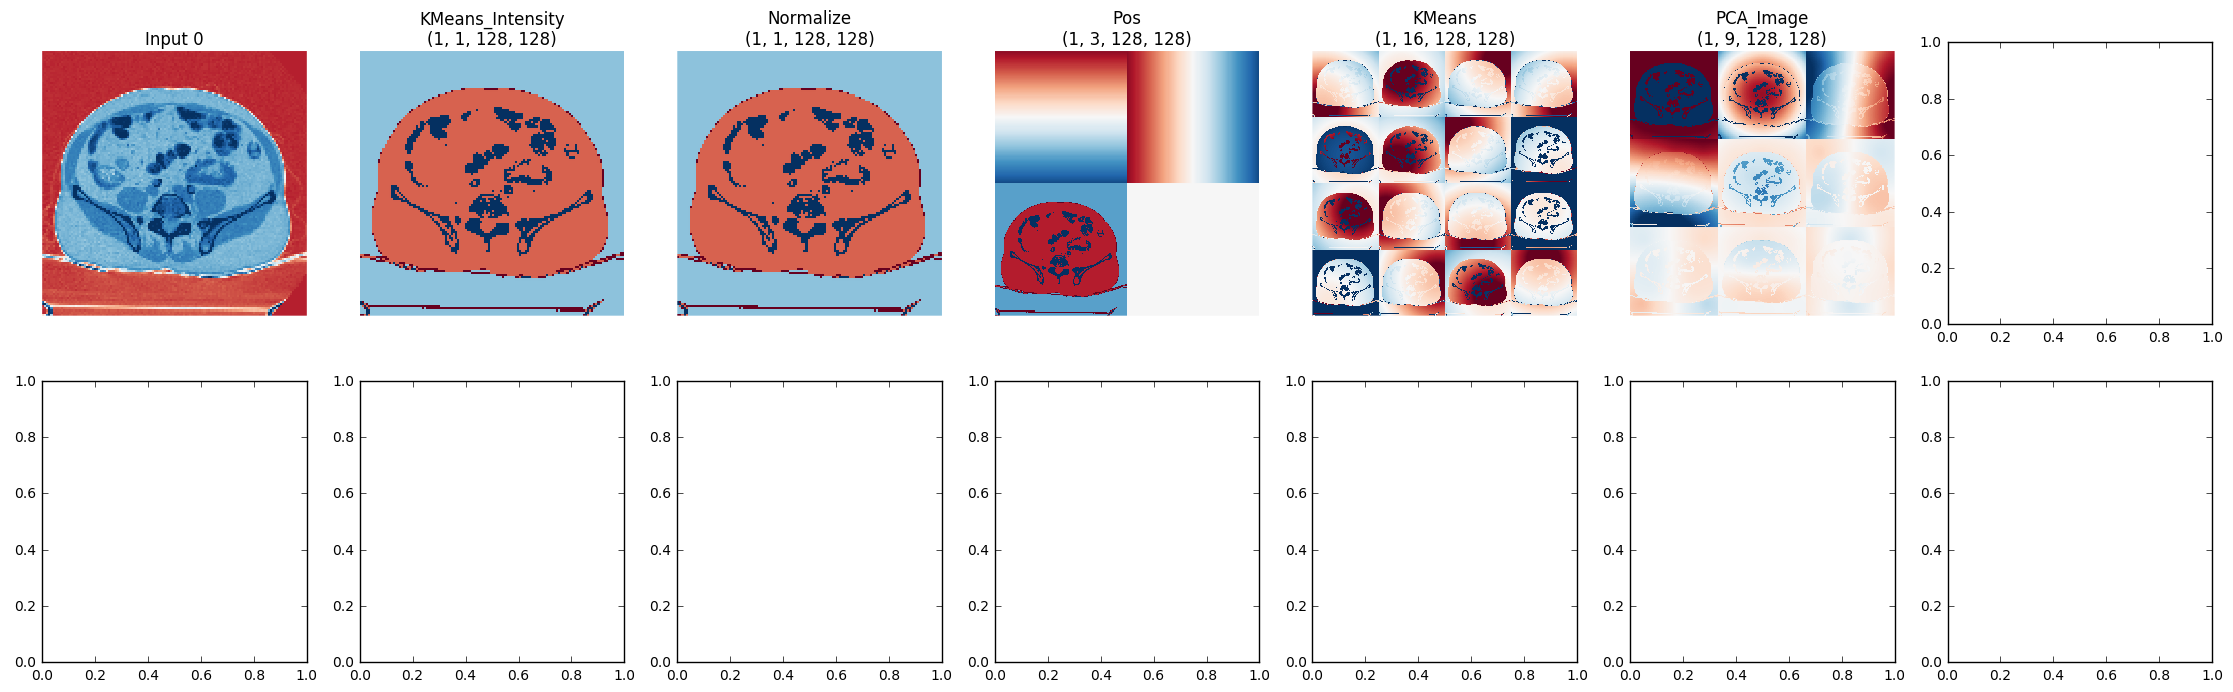

In [14]:
_=visualize_pipeline(bone_seg_pipe,x_train[0:2],True)